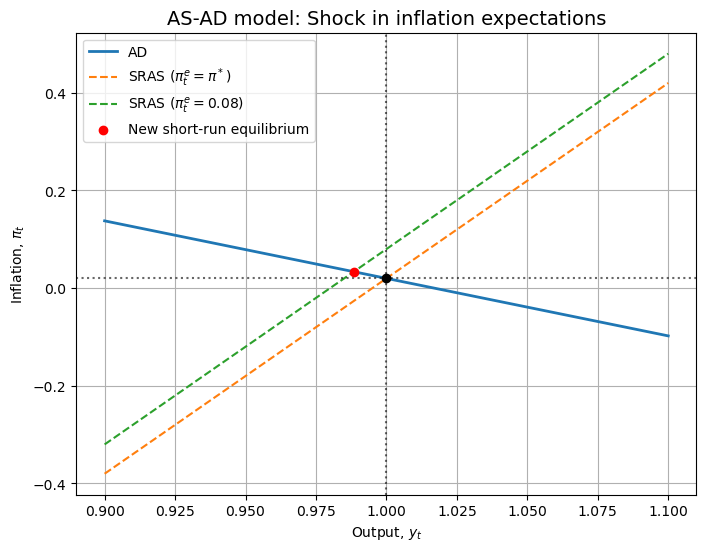

In [ ]:
# Question 3.1

import numpy as np
import matplotlib.pyplot as plt

# 1. variables
y_bar = 1.0
pi_star = 0.02
b = 0.6
alpha1 = 1.5
alpha2 = 0.10
gamma = 4.0
phi = 0.6

# Estimate alpha
alpha = (b * alpha1) / (1 + b * alpha2)


# 2. Define output interval
y = np.linspace(0.9, 1.1, 400)


# 3. Creating the AD-curve (z_t = 0)
pi_AD = pi_star - (1 / alpha) * (y - y_bar)


# 4. Creating the SRAS-curve

# Before the jump in expectations
pi_e_0 = pi_star
pi_SRAS_0 = pi_e_0 + gamma * (y - y_bar)
# After the jump in expectations
pi_e_1 = 0.08
pi_SRAS_1 = pi_e_1 + gamma * (y - y_bar)


# 5. Equilibrium after (z_t = 0)
y_star = y_bar + (1 / ((1 / alpha) + gamma)) * (pi_star - pi_e_1)
pi_star_new = pi_e_1 + gamma * (y_star - y_bar)


# 6. Plotting the AS-AD model

plt.figure(figsize=(8,6))

plt.plot(y, pi_AD, label="AD", linewidth=2)
plt.plot(y, pi_SRAS_0, label="SRAS ($\\pi_t^e = \\pi^*$)", linestyle="--")
plt.plot(y, pi_SRAS_1, label="SRAS ($\\pi_t^e = 0.08$)", linestyle="--")

# Long sighted equilibrium
plt.scatter(y_bar, pi_star, color="black", zorder=5)
plt.axvline(y_bar, linestyle=":", color="black", alpha=0.6)
plt.axhline(pi_star, linestyle=":", color="black", alpha=0.6)

# New short sighted equilibrium
plt.scatter(y_star, pi_star_new, color="red", zorder=5, label="New short-run equilibrium")

# Layout
plt.xlabel("Output, $y_t$")
plt.ylabel("Inflation, $\\pi_t$")
plt.title("AS-AD model: Shock in inflation expectations", fontsize=14)
plt.legend()
plt.grid(True)

plt.show()


The equilibrium is reached when the inflation rate is 0,02.

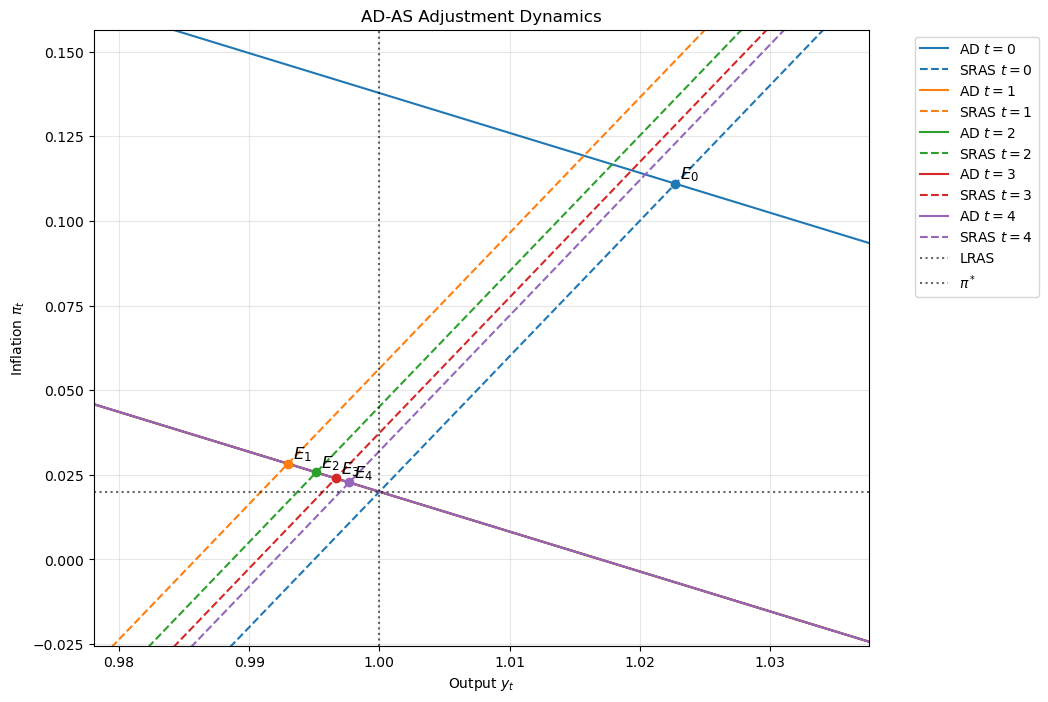

In [13]:
# Question 3.2

# Simulation parameters
v0 = 0.1
T = 5
pi_e_list = [pi_star] 
y_list = []
pi_list = []

# Define output grid for plotting curves 
y_vals = np.linspace(0.9, 1.1, 100)

plt.figure(figsize=(10, 8))

# Keep track of min/max values to zoom in later
all_y_points = [y_bar]
all_pi_points = [pi_star]

# Simulation loop
for t in range(T):
    
    # 1. Update Expectations (for t > 0)
    if t > 0:
        pi_e_new = phi * pi_e_list[-1] + (1 - phi) * pi_list[-1]
        pi_e_list.append(pi_e_new)
    
    pi_e = pi_e_list[t]
    
    # 2. Demand Shock (v_t = 0.1 for t=0, else 0)
    v = v0 if t == 0 else 0
    
    # 3. Calculate Equilibrium
    
    # Solving for y:
    y_eq = y_bar + (pi_star - pi_e + v/alpha) / (gamma + 1/alpha)
    
    # Solving for pi:
    pi_eq = pi_e + gamma * (y_eq - y_bar)
    
    # Store results for plotting limits
    y_list.append(y_eq)
    pi_list.append(pi_eq)
    all_y_points.append(y_eq)
    all_pi_points.append(pi_eq)
    
    # 4. Plot Curves
    # Calculate AD and SRAS lines for the grid
    AD_line = pi_star - (1/alpha)*(y_vals - y_bar) + (v/alpha)
    AS_line = pi_e + gamma * (y_vals - y_bar)
    
    # Plotting
    p = plt.plot(y_vals, AD_line, label=f'AD $t={t}$')
    color = p[0].get_color()
    plt.plot(y_vals, AS_line, linestyle='--', color=color, label=f'SRAS $t={t}$')
    plt.scatter(y_eq, pi_eq, color=color, zorder=5)
    
    # Annotate points clearly
    plt.text(y_eq, pi_eq, f' $E_{t}$', fontsize=12, verticalalignment='bottom')

# Finalize plot
plt.axvline(y_bar, color='black', linestyle=':', alpha=0.6, label='LRAS')
plt.axhline(pi_star, color='black', linestyle=':', alpha=0.6, label='$\pi^*$')

# Calculate the spread of data to center the view
y_min, y_max = min(all_y_points), max(all_y_points)
pi_min, pi_max = min(all_pi_points), max(all_pi_points)

# Add 10% padding around the extreme points
y_padding = (y_max - y_min) * 0.5 if y_max != y_min else 0.05
pi_padding = (pi_max - pi_min) * 0.5 if pi_max != pi_min else 0.05
plt.xlim(y_min - y_padding, y_max + y_padding)
plt.ylim(pi_min - pi_padding, pi_max + pi_padding)
plt.xlabel("Output $y_t$")
plt.ylabel("Inflation $\pi_t$")
plt.title("AD-AS Adjustment Dynamics")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

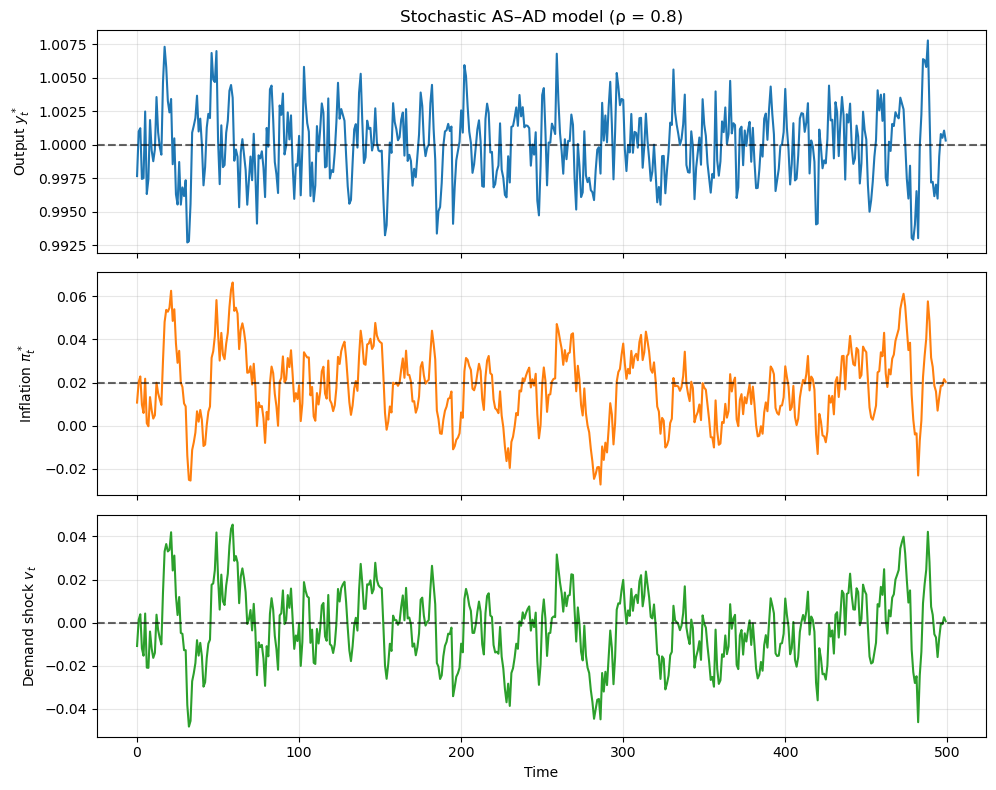

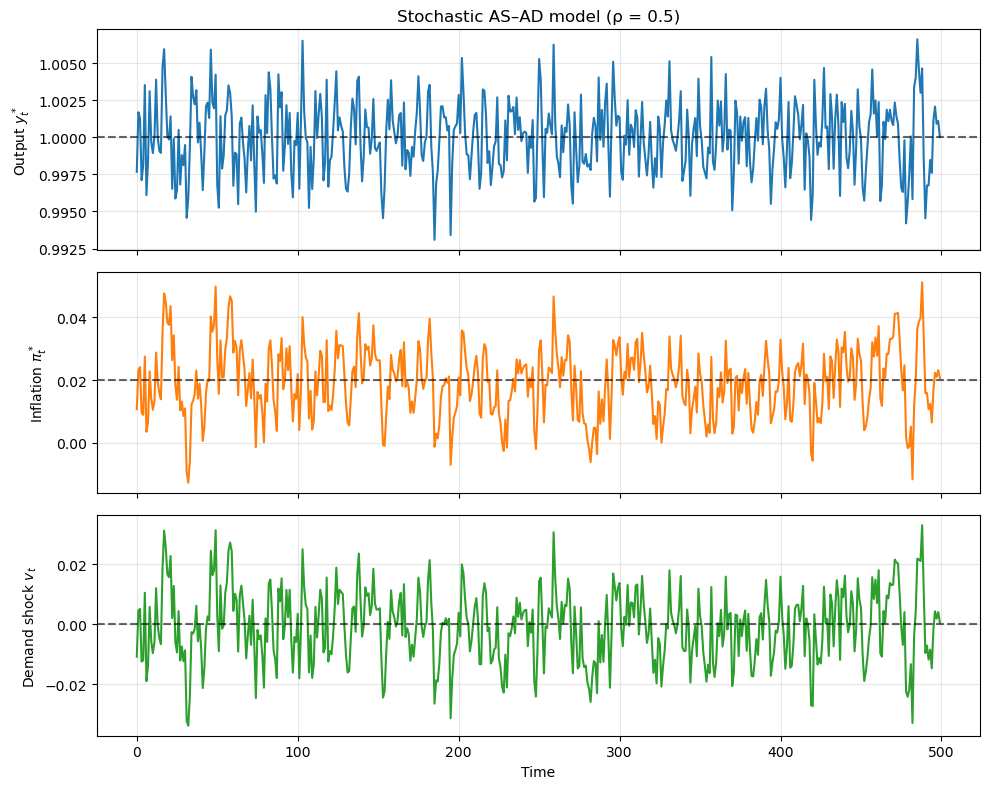

rho = 0.8
Std(output): 0.0027012729373851493
Std(inflation): 0.01680813548863305
Correlation: 0.5142543142423762

rho = 0.5
Std(output): 0.0023939833969292765
Std(inflation): 0.010929121027951658
Correlation: 0.700981510128079



In [ ]:
# Question 3.3

# Taking use of the model parameters from Question 3.1

sigma_eps = 0.01
T = 500

alpha = (b * alpha1) / (1 + b * alpha2)


# 2. Simulation function
def simulate_as_ad(rho):

    np.random.seed(123)

    v = np.zeros(T)
    pi_e = np.zeros(T)
    y_star = np.zeros(T)
    pi_star_t = np.zeros(T)

    pi_e[0] = pi_star

    for t in range(T):

        if t > 0:
            pi_e[t] = phi * pi_e[t-1] + (1 - phi) * pi_star_t[t-1]

        eps_t = np.random.normal(0, sigma_eps)

        if t == 0:
            v[t] = eps_t
        else:
            v[t] = rho * v[t-1] + eps_t

        z_t = v[t] / (1 + b * alpha2)

        y_star[t] = y_bar + (1 / ((1 / alpha) + gamma)) * (
            pi_star - pi_e[t] + (1 / alpha) * z_t
        )

        pi_star_t[t] = pi_e[t] + gamma * (y_star[t] - y_bar)

    return y_star, pi_star_t, v


# 3. Running simulations
y_08, pi_08, v_08 = simulate_as_ad(rho=0.8)
y_05, pi_05, v_05 = simulate_as_ad(rho=0.5)


# 4. Plotting function 
def plot_time_series(y, pi, v, rho):

    fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    # Output
    axs[0].plot(y, color="tab:blue")
    axs[0].axhline(y_bar, linestyle="--", color="black", alpha=0.6)
    axs[0].set_ylabel("Output $y_t^*$")
    # axs[0].set_ylim(0.98, 1.02)  <-- REMOVED to prevent cutting off data
    axs[0].set_title(f"Stochastic AS–AD model (ρ = {rho})")
    axs[0].grid(True, alpha=0.3) # Added grid for readability

    # Inflation
    axs[1].plot(pi, color="tab:orange")
    axs[1].axhline(pi_star, linestyle="--", color="black", alpha=0.6)
    axs[1].set_ylabel("Inflation $\\pi_t^*$")
    # axs[1].set_ylim(-0.02, 0.06) <-- REMOVED
    axs[1].grid(True, alpha=0.3)

    # Demand shock
    axs[2].plot(v, color="tab:green")
    axs[2].axhline(0, linestyle="--", color="black", alpha=0.6)
    axs[2].set_ylabel("Demand shock $v_t$")
    axs[2].set_xlabel("Time")
    # axs[2].set_ylim(-0.05, 0.05) <-- REMOVED
    axs[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


# 5. Plot results
plot_time_series(y_08, pi_08, v_08, rho=0.8)
plot_time_series(y_05, pi_05, v_05, rho=0.5)


# 6. Statistics
def print_statistics(y, pi, rho):

    print(f"rho = {rho}")
    print("Std(output):", np.std(y))
    print("Std(inflation):", np.std(pi))
    print("Correlation:", np.corrcoef(y, pi)[0, 1])
    print()

print_statistics(y_08, pi_08, rho=0.8)
print_statistics(y_05, pi_05, rho=0.5)

